In [1]:
import pandas as pd

# Path to the file in WSL format
file_path = '/mnt/d/FY2024/myPython/myJupyterNB/adult.data'

# Read the data file into a pandas DataFrame
data = pd.read_csv(file_path, header=None)

# Display the first few rows of the DataFrame
print(data.head())


    0                  1        2           3              4   \
0  age          workclass   fnlwgt   education  education-num   
1   39          State-gov    77516   Bachelors             13   
2   50   Self-emp-not-inc    83311   Bachelors             13   
3   38            Private   215646     HS-grad              9   
4   53            Private   234721        11th              7   

                    5                   6               7       8      9   \
0       marital-status          occupation    relationship    race    sex   
1        Never-married        Adm-clerical   Not-in-family   White   Male   
2   Married-civ-spouse     Exec-managerial         Husband   White   Male   
3             Divorced   Handlers-cleaners   Not-in-family   White   Male   
4   Married-civ-spouse   Handlers-cleaners         Husband   Black   Male   

             10            11              12              13      14  
0  capital-gain  capital-loss  hours-per-week  native-country   label  
1 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fairlearn.datasets import fetch_adult
data = fetch_adult(as_frame=True)
print(data)
X = pd.get_dummies(data.data)
y_true = (data.target == '>50K') * 1
sex = data.data['sex']
sex.value_counts()

{'data':        age     workclass  fnlwgt     education  education-num  \
0       25       Private  226802          11th              7   
1       38       Private   89814       HS-grad              9   
2       28     Local-gov  336951    Assoc-acdm             12   
3       44       Private  160323  Some-college             10   
4       18           NaN  103497  Some-college             10   
...    ...           ...     ...           ...            ...   
48837   27       Private  257302    Assoc-acdm             12   
48838   40       Private  154374       HS-grad              9   
48839   58       Private  151910       HS-grad              9   
48840   22       Private  201490       HS-grad              9   
48841   52  Self-emp-inc  287927       HS-grad              9   

           marital-status         occupation relationship   race     sex  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishing      Husband 

sex
Male      32650
Female    16192
Name: count, dtype: int64

In [4]:
from pyspark.sql import SparkSession
import pandas as pd

# Initialize a Spark session
spark = SparkSession.builder \
    .appName("Read Data") \
    .getOrCreate()

# Path to the file in WSL format
file_path = '/mnt/d/FY2024/myPython/myJupyterNB/adult.data'

# Read the data file into a PySpark DataFrame
spark_df = spark.read.csv(file_path, header=False, inferSchema=True)

# Convert the PySpark DataFrame to a pandas DataFrame
df = spark_df.toPandas()
df.columns = df.iloc[0]  # Set the headers to the first row
df = df[1:]  # Remove the first row

# Display the pandas DataFrame
print(df.head())

# Stop the Spark session
spark.stop()


24/07/22 14:35:38 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


0 age          workclass   fnlwgt   education education-num  \
1  39          State-gov    77516   Bachelors            13   
2  50   Self-emp-not-inc    83311   Bachelors            13   
3  38            Private   215646     HS-grad             9   
4  53            Private   234721        11th             7   
5  28            Private   338409   Bachelors            13   

0       marital-status          occupation    relationship    race      sex  \
1        Never-married        Adm-clerical   Not-in-family   White     Male   
2   Married-civ-spouse     Exec-managerial         Husband   White     Male   
3             Divorced   Handlers-cleaners   Not-in-family   White     Male   
4   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
5   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

0 capital-gain capital-loss hours-per-week  native-country   label  
1         2174            0             40   United-States   <=50K  
2       

### Trian the model

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the data into train and test sets
X_train, X_test, y_train, y_test, sex_train, sex_test = train_test_split(X, y_true, sex, test_size=0.3, random_state=0, stratify=y_true)

# Train a Logistic Regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.796901658363475
              precision    recall  f1-score   support

           0       0.80      0.97      0.88     11147
           1       0.71      0.25      0.37      3506

    accuracy                           0.80     14653
   macro avg       0.76      0.61      0.63     14653
weighted avg       0.78      0.80      0.76     14653



### Step 3: Detect Bias using Fairlearn
We'll check for fairness issues using metrics such as demographic parity and equalized odds.

In [11]:
from pyspark.sql import SparkSession
import pandas as pd

# Initialize a Spark session
spark = SparkSession.builder \
    .appName("Read Data") \
    .getOrCreate()

# Path to the file in WSL format
file_path = '/mnt/d/FY2024/myPython/myJupyterNB/adult.data'

# Read the data file into a PySpark DataFrame
spark_df = spark.read.csv(file_path, header=False, inferSchema=True)

# Convert the PySpark DataFrame to a pandas DataFrame
df = spark_df.toPandas()

# Set the headers to the first row and remove the first row
df.columns = df.iloc[0]
df = df[1:]

# Reset index after removing the first row
df.reset_index(drop=True, inplace=True)

# Display the pandas DataFrame
print(df.head())

# Stop the Spark session
spark.stop()


0 age          workclass   fnlwgt   education education-num  \
0  39          State-gov    77516   Bachelors            13   
1  50   Self-emp-not-inc    83311   Bachelors            13   
2  38            Private   215646     HS-grad             9   
3  53            Private   234721        11th             7   
4  28            Private   338409   Bachelors            13   

0       marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

0 capital-gain capital-loss hours-per-week  native-country   label  
0         2174            0             40   United-States   <=50K  
1       

In [12]:
from pyspark.sql import SparkSession
import pandas as pd
from fairlearn.metrics import demographic_parity_difference
from sklearn.preprocessing import LabelEncoder

# Initialize a Spark session
spark = SparkSession.builder \
    .appName("Read Data") \
    .getOrCreate()

# Path to the file in WSL format
file_path = '/mnt/d/FY2024/myPython/myJupyterNB/adult.data'

# Read the data file into a PySpark DataFrame
spark_df = spark.read.csv(file_path, header=False, inferSchema=True)

# Convert the PySpark DataFrame to a pandas DataFrame
df = spark_df.toPandas()

# Set the headers to the first row and remove the first row
df.columns = df.iloc[0]
df = df[1:]

# Reset index after removing the first row
df.reset_index(drop=True, inplace=True)

# Display the pandas DataFrame
print(df.head())

# Ensure sensitive_feature and label columns are present
sensitive_feature = 'sensitive_feature'
label = 'label'

if sensitive_feature not in df.columns or label not in df.columns:
    raise ValueError(f"Expected columns '{sensitive_feature}' and '{label}' are not present in the DataFrame.")

# Convert data types
df[sensitive_feature] = df[sensitive_feature].astype('str')
df[label] = df[label].astype('int')

# Encoding sensitive feature and label
sensitive_feature_encoder = LabelEncoder()
label_encoder = LabelEncoder()

df['sensitive_feature_encoded'] = sensitive_feature_encoder.fit_transform(df[sensitive_feature])
df['label_encoded'] = label_encoder.fit_transform(df[label])

# Calculate demographic parity difference
dpd = demographic_parity_difference(
    y_true=df['label_encoded'],
    y_pred=df['label_encoded'],  # Assuming the predictions are the same as true labels
    sensitive_features=df['sensitive_feature_encoded']
)

# Display the metric
print(f"Demographic Parity Difference: {dpd}")

# Stop the Spark session
spark.stop()


24/07/22 14:48:26 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


0 age          workclass   fnlwgt   education education-num  \
0  39          State-gov    77516   Bachelors            13   
1  50   Self-emp-not-inc    83311   Bachelors            13   
2  38            Private   215646     HS-grad             9   
3  53            Private   234721        11th             7   
4  28            Private   338409   Bachelors            13   

0       marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

0 capital-gain capital-loss hours-per-week  native-country   label  
0         2174            0             40   United-States   <=50K  
1       

ValueError: Expected columns 'sensitive_feature' and 'label' are not present in the DataFrame.

In [10]:
from pyspark.sql import SparkSession
import pandas as pd
from fairlearn.metrics import demographic_parity_difference
from fairlearn.metrics import MetricFrame
from sklearn.preprocessing import LabelEncoder

# Initialize a Spark session
spark = SparkSession.builder \
    .appName("Read Data") \
    .getOrCreate()

# Path to the file in WSL format
file_path = '/mnt/d/FY2024/myPython/myJupyterNB/adult.data'

# Read the data file into a PySpark DataFrame
spark_df = spark.read.csv(file_path, header=False, inferSchema=True)

# Convert the PySpark DataFrame to a pandas DataFrame
pandas_df = spark_df.toPandas()

# Remove the first row (header) from the DataFrame
pandas_df = pandas_df[1:].reset_index(drop=True)

# Assign new column names
pandas_df.columns = ['feature1', 'feature2', 'sensitive_feature', 'feature4', 'label']

# Display column names to verify correct renaming
print("Columns in DataFrame:", pandas_df.columns)

# Ensure sensitive_feature and label columns are present
if 'sensitive_feature' not in pandas_df.columns or 'label' not in pandas_df.columns:
    raise ValueError("Expected columns 'sensitive_feature' and 'label' are not present in the DataFrame.")

# Convert data types
pandas_df['sensitive_feature'] = pandas_df['sensitive_feature'].astype('str')
pandas_df['label'] = pandas_df['label'].astype('int')

# Encoding sensitive feature and label
sensitive_feature_encoder = LabelEncoder()
label_encoder = LabelEncoder()

pandas_df['sensitive_feature_encoded'] = sensitive_feature_encoder.fit_transform(pandas_df['sensitive_feature'])
pandas_df['label_encoded'] = label_encoder.fit_transform(pandas_df['label'])

# Calculate demographic parity difference
metric_frame = MetricFrame(
    metrics=demographic_parity_difference,
    y_true=pandas_df['label_encoded'],
    sensitive_features=pandas_df['sensitive_feature_encoded']
)

# Display the metric
dpd = metric_frame.overall
print(f"Demographic Parity Difference: {dpd}")

# Stop the Spark session
spark.stop()


ValueError: Length mismatch: Expected axis has 15 elements, new values have 5 elements

#### DIrect from Fairlearn NOTEBOOK

In [15]:
import pandas as pd
from fairlearn.datasets import fetch_adult
from sklearn.metrics import accuracy_score, precision_score
from sklearn.tree import DecisionTreeClassifier

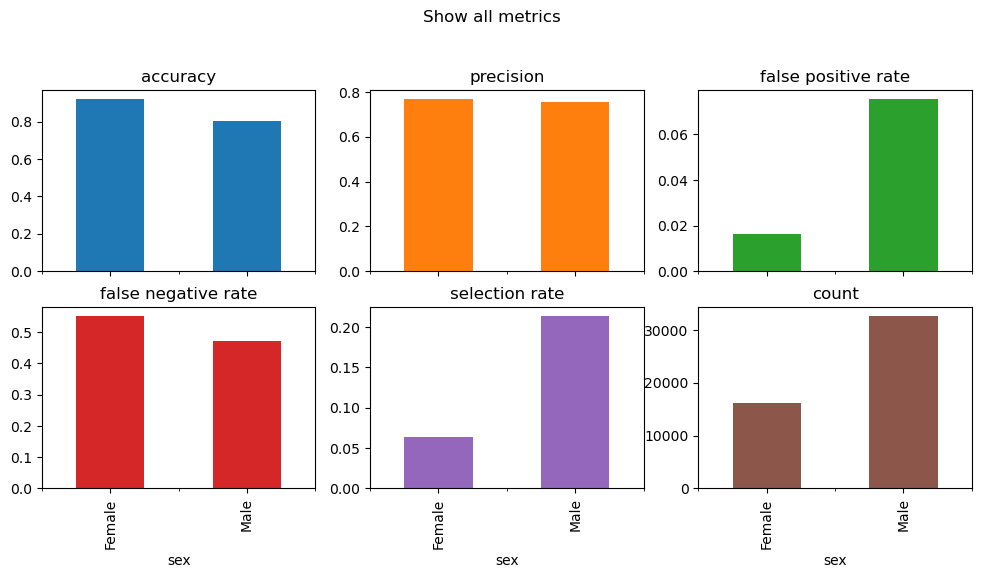

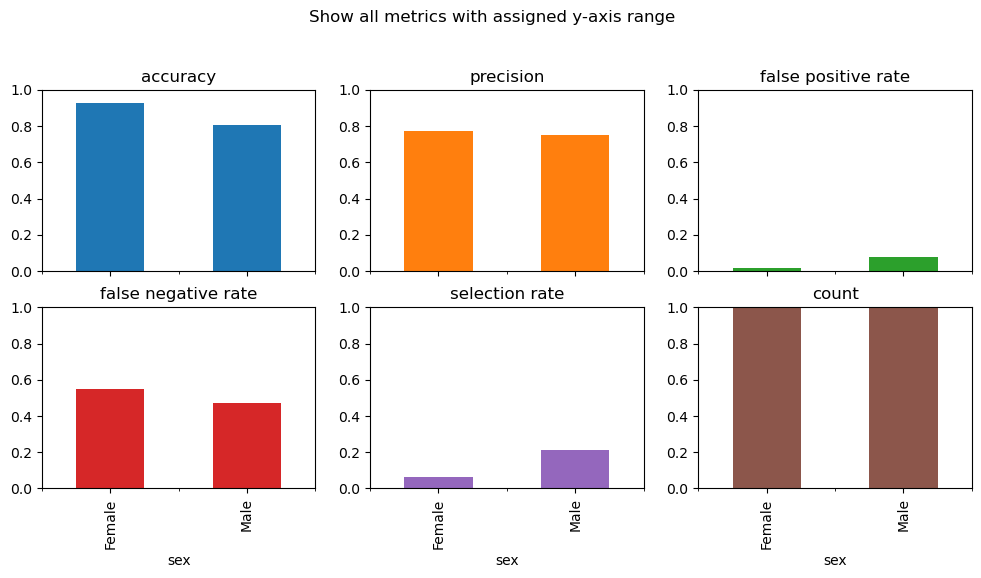

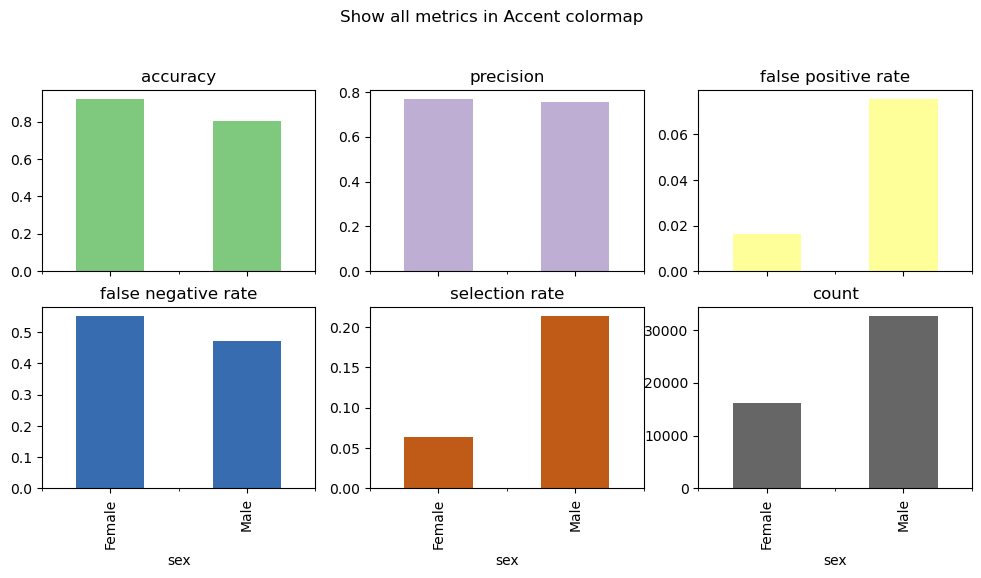

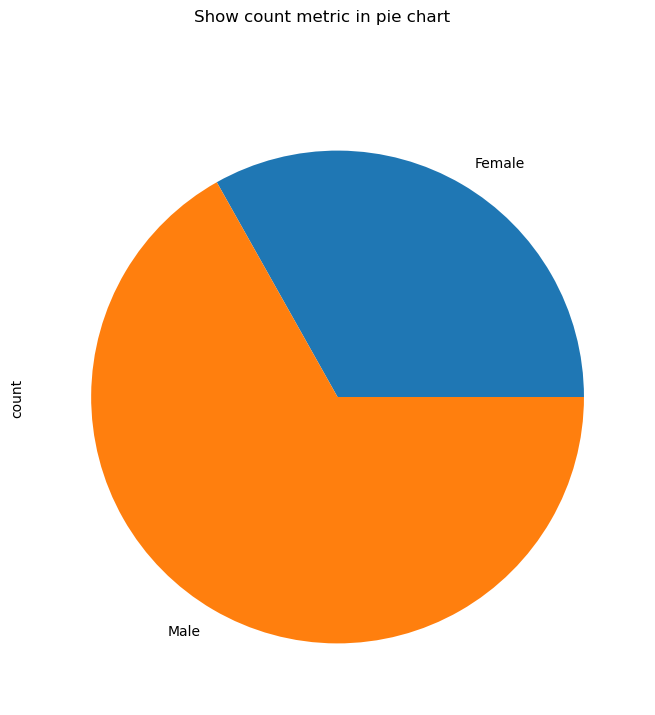

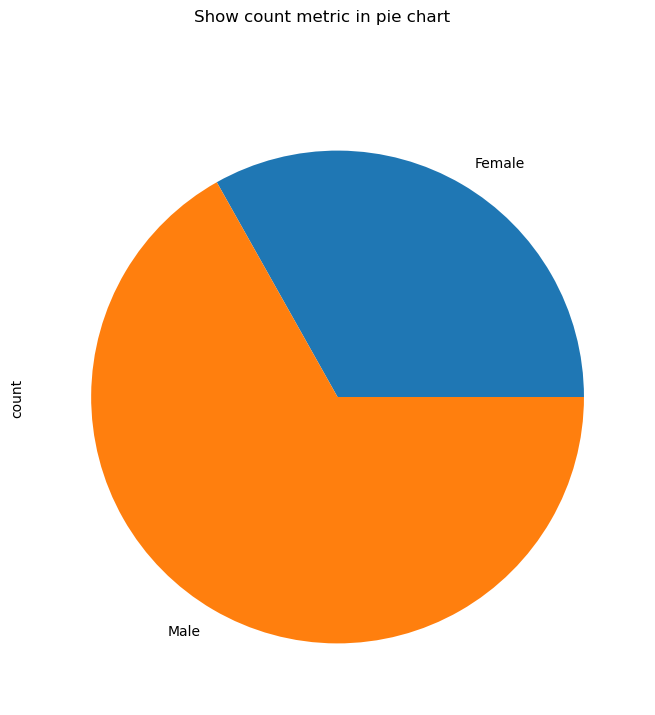

In [16]:
from fairlearn.metrics import (
    MetricFrame,
    count,
    false_negative_rate,
    false_positive_rate,
    selection_rate,
)

data = fetch_adult()
X = pd.get_dummies(data.data)
y_true = (data.target == ">50K") * 1
sex = data.data["sex"]

classifier = DecisionTreeClassifier(min_samples_leaf=10, max_depth=4)
classifier.fit(X, y_true)
y_pred = classifier.predict(X)

# Analyze metrics using MetricFrame
metrics = {
    "accuracy": accuracy_score,
    "precision": precision_score,
    "false positive rate": false_positive_rate,
    "false negative rate": false_negative_rate,
    "selection rate": selection_rate,
    "count": count,
}
metric_frame = MetricFrame(
    metrics=metrics, y_true=y_true, y_pred=y_pred, sensitive_features=sex
)
metric_frame.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    title="Show all metrics",
)

# Customize plots with ylim
metric_frame.by_group.plot(
    kind="bar",
    ylim=[0, 1],
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    title="Show all metrics with assigned y-axis range",
)

# Customize plots with colormap
metric_frame.by_group.plot(
    kind="bar",
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    colormap="Accent",
    title="Show all metrics in Accent colormap",
)

# Customize plots with kind (note that we are only plotting the "count" metric here because we are showing a pie chart)
metric_frame.by_group[["count"]].plot(
    kind="pie",
    subplots=True,
    layout=[1, 1],
    legend=False,
    figsize=[12, 8],
    title="Show count metric in pie chart",
)

# Saving plots
fig = metric_frame.by_group[["count"]].plot(
    kind="pie",
    subplots=True,
    layout=[1, 1],
    legend=False,
    figsize=[12, 8],
    title="Show count metric in pie chart",
)

# Don't save file during doc build
if "__file__" in locals():
    fig[0][0].figure.savefig("filename.png")

In [ ]:
from fairlearn.metrics import (
    MetricFrame,
    count,
    false_negative_rate,
    false_positive_rate,
    selection_rate,
)

data = fetch_adult()
X = pd.get_dummies(data.data)
y_true = (data.target == ">50K") * 1
sex = data.data["sex"]

classifier = DecisionTreeClassifier(min_samples_leaf=10, max_depth=4)
classifier.fit(X, y_true)
y_pred = classifier.predict(X)

# Analyze metrics using MetricFrame
metrics = {
    "accuracy": accuracy_score,
    "precision": precision_score,
    "false positive rate": false_positive_rate,
    "false negative rate": false_negative_rate,
    "selection rate": selection_rate,
    "count": count,
}
metric_frame = MetricFrame(
    metrics=metrics, y_true=y_true, y_pred=y_pred, sensitive_features=sex
)
metric_frame.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    title="Show all metrics",
)

# Customize plots with ylim
metric_frame.by_group.plot(
    kind="bar",
    ylim=[0, 1],
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    title="Show all metrics with assigned y-axis range",
)

# Customize plots with colormap
metric_frame.by_group.plot(
    kind="bar",
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    colormap="Accent",
    title="Show all metrics in Accent colormap",
)

# Customize plots with kind (note that we are only plotting the "count" metric here because we are showing a pie chart)
metric_frame.by_group[["count"]].plot(
    kind="pie",
    subplots=True,
    layout=[1, 1],
    legend=False,
    figsize=[12, 8],
    title="Show count metric in pie chart",
)

# Saving plots
fig = metric_frame.by_group[["count"]].plot(
    kind="pie",
    subplots=True,
    layout=[1, 1],
    legend=False,
    figsize=[12, 8],
    title="Show count metric in pie chart",
)

# Don't save file during doc build
if "__file__" in locals():
    fig[0][0].figure.savefig("filename.png")

In [18]:
from pyspark.sql import SparkSession
import pandas as pd

# Initialize a Spark session
spark = SparkSession.builder \
    .appName("Read Data") \
    .getOrCreate()

# Path to the file in WSL format
file_path = '/mnt/d/FY2024/myPython/myJupyterNB/adult.data'

# Read the data file into a PySpark DataFrame
spark_df = spark.read.csv(file_path, header=False, inferSchema=True)

# Convert the PySpark DataFrame to a pandas DataFrame
df = spark_df.toPandas()

# Set headers to the first row and remove the first row
df.columns = df.iloc[0]
df = df[1:]

# Reset index after removing the first row
df.reset_index(drop=True, inplace=True)

# Display the DataFrame
print(df.head())

# Process the DataFrame
# Creating dummy variables for features
X = pd.get_dummies(df)

# Setting y_true: target variable (with 'label' column)
y_true = (df['label'] == '>50K') * 1

# Extracting the sensitive feature 'sex'
sex = df['sex']

# Display value counts of the 'sex' column
print(sex.value_counts())

# Stop the Spark session
spark.stop()


0 age          workclass   fnlwgt   education education-num  \
0  39          State-gov    77516   Bachelors            13   
1  50   Self-emp-not-inc    83311   Bachelors            13   
2  38            Private   215646     HS-grad             9   
3  53            Private   234721        11th             7   
4  28            Private   338409   Bachelors            13   

0       marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

0 capital-gain capital-loss hours-per-week  native-country   label  
0         2174            0             40   United-States   <=50K  
1       

In [19]:
from pyspark.sql import SparkSession
import pandas as pd

# Initialize Spark session
spark = SparkSession.builder.appName("Read Data").getOrCreate()

# Read data using PySpark
file_path = '/mnt/d/FY2024/myPython/myJupyterNB/adult.data'
spark_df = spark.read.csv(file_path, header=False, inferSchema=True)
df = spark_df.toPandas()

# Set headers and process
df.columns = df.iloc[0]
df = df[1:]
df.reset_index(drop=True, inplace=True)

# Check value counts
print("File-based data:")
print("Label value counts:")
print(df['label'].value_counts())
print("Sex value counts:")
print(df['sex'].value_counts())

# Compare with fetched data
from fairlearn.datasets import fetch_adult
data = fetch_adult(as_frame=True)

print("Fetched data:")
print("Label value counts:")
print((data.target == '>50K').astype(int).value_counts())
print("Sex value counts:")
print(data.data['sex'].value_counts())

# Stop Spark session
spark.stop()


24/07/22 17:46:48 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


File-based data:
Label value counts:
label
 <=50K    24720
 >50K      7841
Name: count, dtype: int64
Sex value counts:
sex
 Male      21790
 Female    10771
Name: count, dtype: int64
Fetched data:
Label value counts:
class
0    37155
1    11687
Name: count, dtype: int64
Sex value counts:
sex
Male      32650
Female    16192
Name: count, dtype: int64


## Download data and then compare saved one

In [20]:
import requests

# URL of the dataset
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
local_file_path = '/mnt/d/FY2024/myPython/myJupyterNB/adult_downloaded.data'

# Download the file
response = requests.get(url)
with open(local_file_path, 'wb') as file:
    file.write(response.content)

print(f"File downloaded and saved to {local_file_path}")


File downloaded and saved to /mnt/d/FY2024/myPython/myJupyterNB/adult_downloaded.data


In [21]:
import pandas as pd

# Paths to the files
existing_file_path = '/mnt/d/FY2024/myPython/myJupyterNB/adult.data'
downloaded_file_path = '/mnt/d/FY2024/myPython/myJupyterNB/adult_downloaded.data'

# Read the files into pandas DataFrames
df_existing = pd.read_csv(existing_file_path, header=None)
df_downloaded = pd.read_csv(downloaded_file_path, header=None)

# Set headers and remove the first row if needed
df_existing.columns = df_existing.iloc[0]
df_existing = df_existing[1:]
df_existing.reset_index(drop=True, inplace=True)

df_downloaded.columns = df_downloaded.iloc[0]
df_downloaded = df_downloaded[1:]
df_downloaded.reset_index(drop=True, inplace=True)

# Display basic statistics and first few rows for comparison
print("Existing File Data Sample:")
print(df_existing.head())

print("Downloaded File Data Sample:")
print(df_downloaded.head())

# Compare value counts for 'label' column
print("Existing File Label Value Counts:")
print(df_existing['label'].value_counts())

print("Downloaded File Label Value Counts:")
print(df_downloaded['label'].value_counts())

# Compare value counts for 'sex' column
print("Existing File Sex Value Counts:")
print(df_existing['sex'].value_counts())

print("Downloaded File Sex Value Counts:")
print(df_downloaded['sex'].value_counts())

# Additional comparison
print("Existing File Shape:")
print(df_existing.shape)

print("Downloaded File Shape:")
print(df_downloaded.shape)


Existing File Data Sample:
0 age          workclass   fnlwgt   education education-num  \
0  39          State-gov    77516   Bachelors            13   
1  50   Self-emp-not-inc    83311   Bachelors            13   
2  38            Private   215646     HS-grad             9   
3  53            Private   234721        11th             7   
4  28            Private   338409   Bachelors            13   

0       marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

0 capital-gain capital-loss hours-per-week  native-country   label  
0         2174            0             40   Unite

KeyError: 'label'

In [23]:
import pandas as pd
import requests

# URL of the dataset
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
local_file_path = '/mnt/d/FY2024/myPython/myJupyterNB/adult_downloaded.data'

# Download the file
response = requests.get(url)
with open(local_file_path, 'wb') as file:
    file.write(response.content)

print(f"File downloaded and saved to {local_file_path}")

# Paths to the files
existing_file_path = '/mnt/d/FY2024/myPython/myJupyterNB/adult.data'
downloaded_file_path = '/mnt/d/FY2024/myPython/myJupyterNB/adult_downloaded.data'

# Read the files into pandas DataFrames
df_existing = pd.read_csv(existing_file_path, header=None)
df_downloaded = pd.read_csv(downloaded_file_path, header=None)

# Set headers (assuming the first row should be headers)
df_existing.columns = df_existing.iloc[0]
df_existing = df_existing[1:]
df_existing.reset_index(drop=True, inplace=True)

df_downloaded.columns = df_downloaded.iloc[0]
df_downloaded = df_downloaded[1:]
df_downloaded.reset_index(drop=True, inplace=True)

# Inspect column names
print("Existing File Columns:")
print(df_existing.columns)

print("Downloaded File Columns:")
print(df_downloaded.columns)

# Inspect first few rows to see column names
print("Existing File Data Sample:")
print(df_existing.head())

print("Downloaded File Data Sample:")
print(df_downloaded.head())

# Check value counts if columns exist
if 'label' in df_existing.columns:
    print("Existing File Label Value Counts:")
    print(df_existing['label'].value_counts())
else:
    print("'label' column not found in existing file")

if 'label' in df_downloaded.columns:
    print("Downloaded File Label Value Counts:")
    print(df_downloaded['label'].value_counts())
else:
    print("'label' column not found in downloaded file")

# Check value counts for 'sex' column if it exists
if 'sex' in df_existing.columns:
    print("Existing File Sex Value Counts:")
    print(df_existing['sex'].value_counts())
else:
    print("'sex' column not found in existing file")

if 'sex' in df_downloaded.columns:
    print("Downloaded File Sex Value Counts:")
    print(df_downloaded['sex'].value_counts())
else:
    print("'sex' column not found in downloaded file")

# Additional comparison
print("Existing File Shape:")
print(df_existing.shape)

print("Downloaded File Shape:")
print(df_downloaded.shape)


File downloaded and saved to /mnt/d/FY2024/myPython/myJupyterNB/adult_downloaded.data
Existing File Columns:
Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'label'],
      dtype='object', name=0)
Downloaded File Columns:
Index([              39,     ' State-gov',            77516,     ' Bachelors',
                     13, ' Never-married',  ' Adm-clerical', ' Not-in-family',
               ' White',          ' Male',             2174,                0,
                     40, ' United-States',         ' <=50K'],
      dtype='object', name=0)
Existing File Data Sample:
0 age          workclass   fnlwgt   education education-num  \
0  39          State-gov    77516   Bachelors            13   
1  50   Self-emp-not-inc    83311   Bachelors            13   
2  38            Private   215646     HS-grad             9   

In [26]:
import requests
import pandas as pd
from pyspark.sql import SparkSession

# Step 1: Download the File
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
local_file_path = '/mnt/d/FY2024/myPython/myJupyterNB/adult_downloaded.data'

# Download the file
response = requests.get(url)
with open(local_file_path, 'wb') as file:
    file.write(response.content)

print(f"File downloaded and saved to {local_file_path}")

# Step 2: Initialize SparkSession
spark = SparkSession.builder \
    .appName("Read and Process Data") \
    .getOrCreate()

# Read the downloaded file into a PySpark DataFrame
spark_df = spark.read.csv(local_file_path, header=False, inferSchema=True)

# Convert the PySpark DataFrame to a pandas DataFrame
df = spark_df.toPandas()

# Set headers and remove the first row
df.columns = df.iloc[0]
df = df[1:]
df.reset_index(drop=True, inplace=True)

# Print column names to diagnose the issue
print("Column Names in Downloaded DataFrame:")
print(df.columns)

# Print the first few rows to understand the structure
print("First few rows of Downloaded DataFrame:")
print(df.head())

# Check if the expected columns are present
if 'label' in df.columns:
    y_true = (df['label'] == '>50K') * 1
else:
    print("'label' column not found in the downloaded dataset")

if 'sex' in df.columns:
    sex = df['sex']
else:
    print("'sex' column not found in the downloaded dataset")

# Create dummy variables for the dataset
X = pd.get_dummies(df)

# Print value counts for the 'sex' column if it exists
if 'sex' in df.columns:
    print(sex.value_counts())

# Optional: Stop SparkSession if not needed anymore
spark.stop()


File downloaded and saved to /mnt/d/FY2024/myPython/myJupyterNB/adult_downloaded.data
Column Names in Downloaded DataFrame:
Index([              39,     ' State-gov',          77516.0,     ' Bachelors',
                   13.0, ' Never-married',  ' Adm-clerical', ' Not-in-family',
               ' White',          ' Male',           2174.0,              0.0,
                   40.0, ' United-States',         ' <=50K'],
      dtype='object', name=0)
First few rows of Downloaded DataFrame:
0  39          State-gov   77516.0   Bachelors  13.0        Never-married  \
0  50   Self-emp-not-inc   83311.0   Bachelors  13.0   Married-civ-spouse   
1  38            Private  215646.0     HS-grad   9.0             Divorced   
2  53            Private  234721.0        11th   7.0   Married-civ-spouse   
3  28            Private  338409.0   Bachelors  13.0   Married-civ-spouse   
4  37            Private  284582.0     Masters  14.0   Married-civ-spouse   

0        Adm-clerical   Not-in-family   Whit

In [27]:
import requests
import pandas as pd
from pyspark.sql import SparkSession
from sklearn.datasets import fetch_openml

# Step 1: Download the File
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
local_file_path = '/mnt/d/FY2024/myPython/myJupyterNB/adult_downloaded.data'

# Download the file
response = requests.get(url)
with open(local_file_path, 'wb') as file:
    file.write(response.content)

print(f"File downloaded and saved to {local_file_path}")

# Step 2: Load data from fetch_adult
data = fetch_openml(name='adult', version=2, as_frame=True)
df_fetch_adult = data.frame

# Display column names and a sample from fetch_adult
print("Columns in fetch_adult DataFrame:")
print(df_fetch_adult.columns)

print("First few rows of fetch_adult DataFrame:")
print(df_fetch_adult.head())

# Step 3: Initialize SparkSession and Read Downloaded Data
spark = SparkSession.builder \
    .appName("Read and Process Data") \
    .getOrCreate()

# Read the downloaded file into a PySpark DataFrame
spark_df = spark.read.csv(local_file_path, header=False, inferSchema=True)

# Convert the PySpark DataFrame to a pandas DataFrame
df_downloaded = spark_df.toPandas()

# Set headers and remove the first row
df_downloaded.columns = df_downloaded.iloc[0]
df_downloaded = df_downloaded[1:]
df_downloaded.reset_index(drop=True, inplace=True)

# Display column names and a sample from downloaded data
print("Columns in Downloaded DataFrame:")
print(df_downloaded.columns)

print("First few rows of Downloaded DataFrame:")
print(df_downloaded.head())

# Optional: Stop SparkSession if not needed anymore
spark.stop()


File downloaded and saved to /mnt/d/FY2024/myPython/myJupyterNB/adult_downloaded.data


/home/amehmood/anaconda3/envs/main_env/lib/python3.8/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Columns in fetch_adult DataFrame:
Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')
First few rows of fetch_adult DataFrame:
    age  workclass    fnlwgt     education  education-num      marital-status  \
0  25.0    Private  226802.0          11th            7.0       Never-married   
1  38.0    Private   89814.0       HS-grad            9.0  Married-civ-spouse   
2  28.0  Local-gov  336951.0    Assoc-acdm           12.0  Married-civ-spouse   
3  44.0    Private  160323.0  Some-college           10.0  Married-civ-spouse   
4  18.0        NaN  103497.0  Some-college           10.0       Never-married   

          occupation relationship   race     sex  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male           0.0           0.0   
1    Farming-fishing      H

24/07/22 18:05:12 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


Columns in Downloaded DataFrame:
Index([              39,     ' State-gov',          77516.0,     ' Bachelors',
                   13.0, ' Never-married',  ' Adm-clerical', ' Not-in-family',
               ' White',          ' Male',           2174.0,              0.0,
                   40.0, ' United-States',         ' <=50K'],
      dtype='object', name=0)
First few rows of Downloaded DataFrame:
0  39          State-gov   77516.0   Bachelors  13.0        Never-married  \
0  50   Self-emp-not-inc   83311.0   Bachelors  13.0   Married-civ-spouse   
1  38            Private  215646.0     HS-grad   9.0             Divorced   
2  53            Private  234721.0        11th   7.0   Married-civ-spouse   
3  28            Private  338409.0   Bachelors  13.0   Married-civ-spouse   
4  37            Private  284582.0     Masters  14.0   Married-civ-spouse   

0        Adm-clerical   Not-in-family   White     Male  2174.0  0.0  40.0  \
0     Exec-managerial         Husband   White     Male    

In [28]:
import requests
import pandas as pd
from pyspark.sql import SparkSession

# Step 1: Download the File
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
local_file_path = '/mnt/d/FY2024/myPython/myJupyterNB/adult_downloaded.data'

# Download the file
response = requests.get(url)
with open(local_file_path, 'wb') as file:
    file.write(response.content)

print(f"File downloaded and saved to {local_file_path}")

# Step 2: Read Downloaded Data with PySpark
spark = SparkSession.builder \
    .appName("Read and Process Data") \
    .getOrCreate()

# Read the downloaded file into a PySpark DataFrame
spark_df = spark.read.csv(local_file_path, header=False, inferSchema=True)

# Convert the PySpark DataFrame to a pandas DataFrame
df_downloaded = spark_df.toPandas()

# Set correct headers
headers = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'label'
]
df_downloaded.columns = headers

# Remove any potential rows that were mistakenly included as data
df_downloaded = df_downloaded[1:].reset_index(drop=True)

# Display column names and a sample from downloaded data
print("Columns in Downloaded DataFrame:")
print(df_downloaded.columns)

print("First few rows of Downloaded DataFrame:")
print(df_downloaded.head())

# Step 3: Load data from fetch_adult for comparison
from sklearn.datasets import fetch_openml

data = fetch_openml(name='adult', version=2, as_frame=True)
df_fetch_adult = data.frame

# Display column names and a sample from fetch_adult
print("Columns in fetch_adult DataFrame:")
print(df_fetch_adult.columns)

print("First few rows of fetch_adult DataFrame:")
print(df_fetch_adult.head())

# Optional: Stop SparkSession if not needed anymore
spark.stop()


File downloaded and saved to /mnt/d/FY2024/myPython/myJupyterNB/adult_downloaded.data


24/07/22 18:08:46 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


Columns in Downloaded DataFrame:
Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'label'],
      dtype='object')
First few rows of Downloaded DataFrame:
   age          workclass    fnlwgt   education  education-num  \
0   50   Self-emp-not-inc   83311.0   Bachelors           13.0   
1   38            Private  215646.0     HS-grad            9.0   
2   53            Private  234721.0        11th            7.0   
3   28            Private  338409.0   Bachelors           13.0   
4   37            Private  284582.0     Masters           14.0   

        marital-status          occupation    relationship    race      sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners

/home/amehmood/anaconda3/envs/main_env/lib/python3.8/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Columns in fetch_adult DataFrame:
Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')
First few rows of fetch_adult DataFrame:
    age  workclass    fnlwgt     education  education-num      marital-status  \
0  25.0    Private  226802.0          11th            7.0       Never-married   
1  38.0    Private   89814.0       HS-grad            9.0  Married-civ-spouse   
2  28.0  Local-gov  336951.0    Assoc-acdm           12.0  Married-civ-spouse   
3  44.0    Private  160323.0  Some-college           10.0  Married-civ-spouse   
4  18.0        NaN  103497.0  Some-college           10.0       Never-married   

          occupation relationship   race     sex  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male           0.0           0.0   
1    Farming-fishing      H

### I hope this works 

In [29]:
import pandas as pd
from pyspark.sql import SparkSession

# Step 1: Initialize Spark session and read the fixed downloaded data
spark = SparkSession.builder \
    .appName("Read and Process Data") \
    .getOrCreate()

# Path to the fixed downloaded file
file_path = '/mnt/d/FY2024/myPython/myJupyterNB/adult_downloaded.data'

# Read the downloaded file into a PySpark DataFrame
spark_df = spark.read.csv(file_path, header=False, inferSchema=True)

# Define the correct headers
headers = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'label'
]

# Convert to pandas DataFrame
df_downloaded = spark_df.toPandas()
df_downloaded.columns = headers

# Remove any extraneous rows if they exist
df_downloaded = df_downloaded[1:].reset_index(drop=True)

# Step 2: Apply transformations similar to fetch_adult

# Convert categorical columns to dummy variables
X = pd.get_dummies(df_downloaded.drop(columns='label'))

# Set y_true based on 'label' column
y_true = (df_downloaded['label'] == '>50K') * 1

# Extract the sensitive feature 'sex'
sex = df_downloaded['sex']

# Display the first few rows and check the processed data
print("First few rows of X:")
print(X.head())

print("First few rows of y_true:")
print(y_true.head())

print("First few rows of sex:")
print(sex.head())

# Optional: Stop SparkSession if not needed anymore
spark.stop()


24/07/22 18:10:42 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


First few rows of X:
   age    fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   50   83311.0           13.0           0.0           0.0            13.0   
1   38  215646.0            9.0           0.0           0.0            40.0   
2   53  234721.0            7.0           0.0           0.0            40.0   
3   28  338409.0           13.0           0.0           0.0            40.0   
4   37  284582.0           14.0           0.0           0.0            40.0   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0         False                   False                 False   
1         False                   False                 False   
2         False                   False                 False   
3         False                   False                 False   
4         False                   False                 False   

   workclass_ Never-worked  ...  native-country_ Portugal  \
0                    False  ...                     

24/07/22 18:15:38 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
/home/amehmood/anaconda3/envs/main_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amehmood/anaconda3/envs/main_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amehmood/anaconda3/envs/main_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  

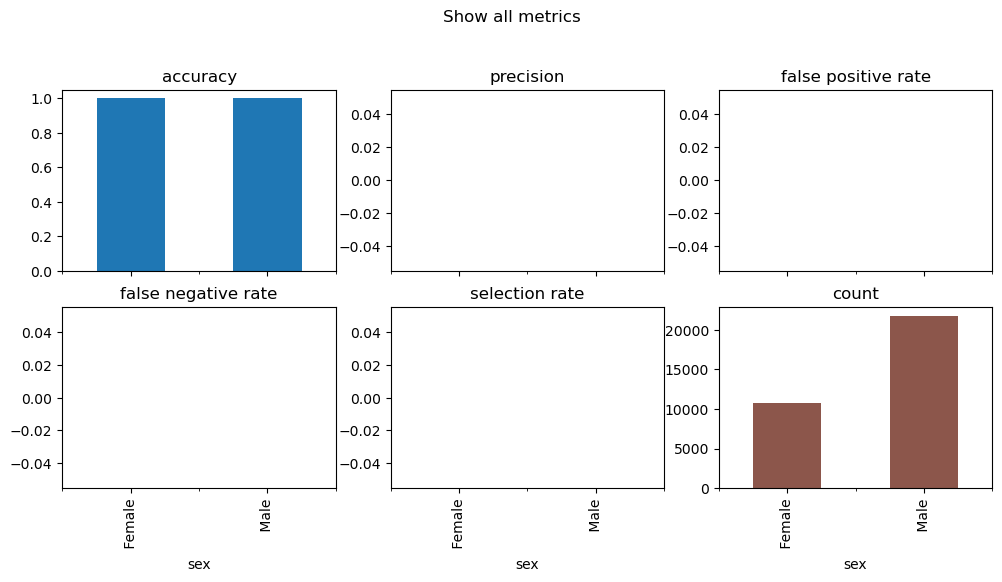

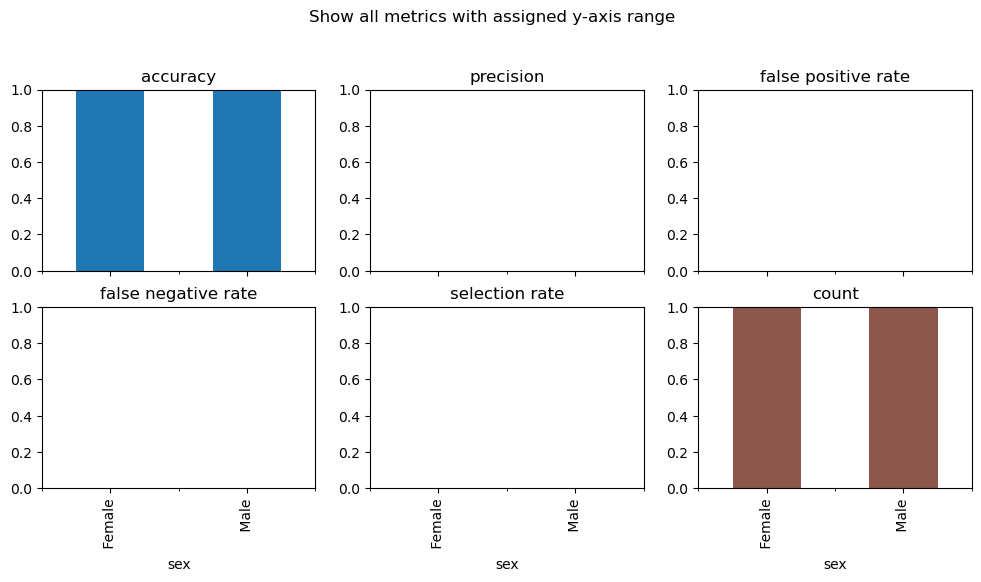

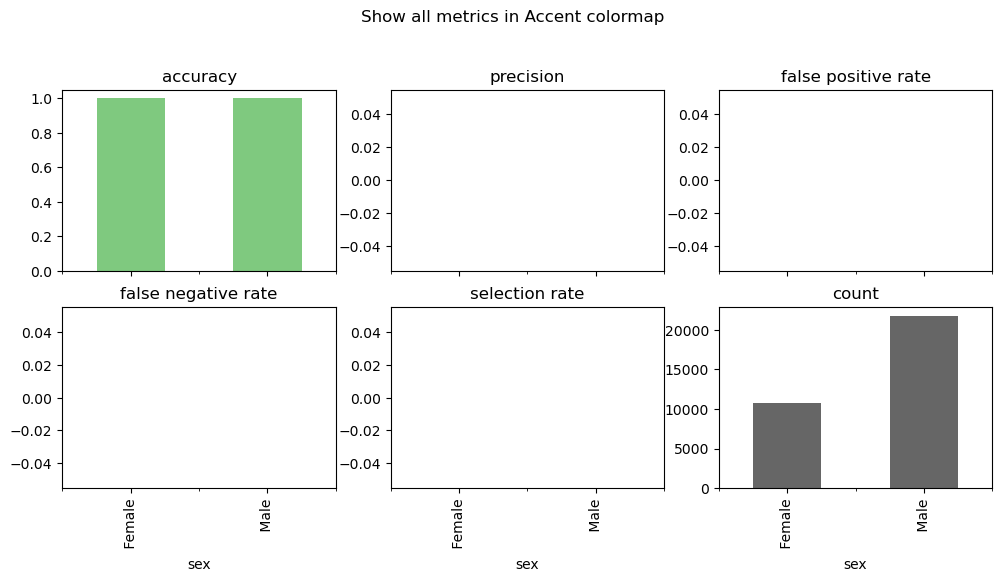

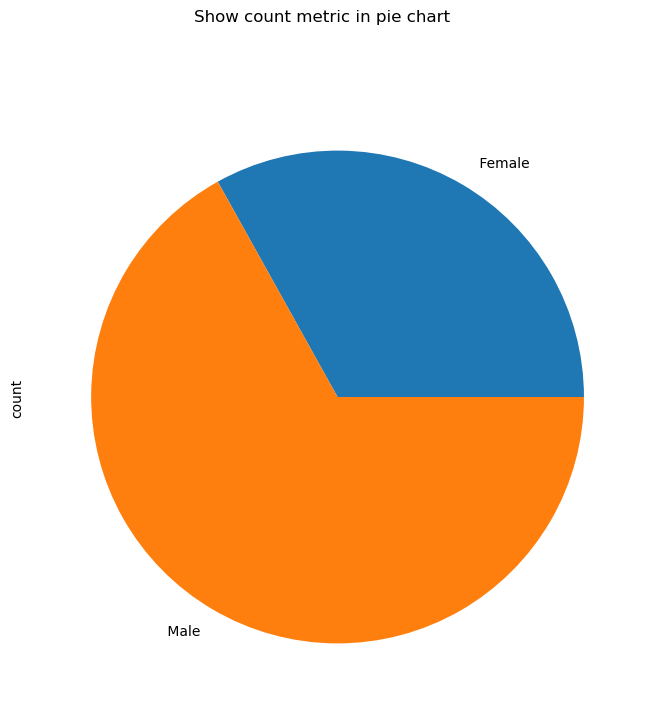

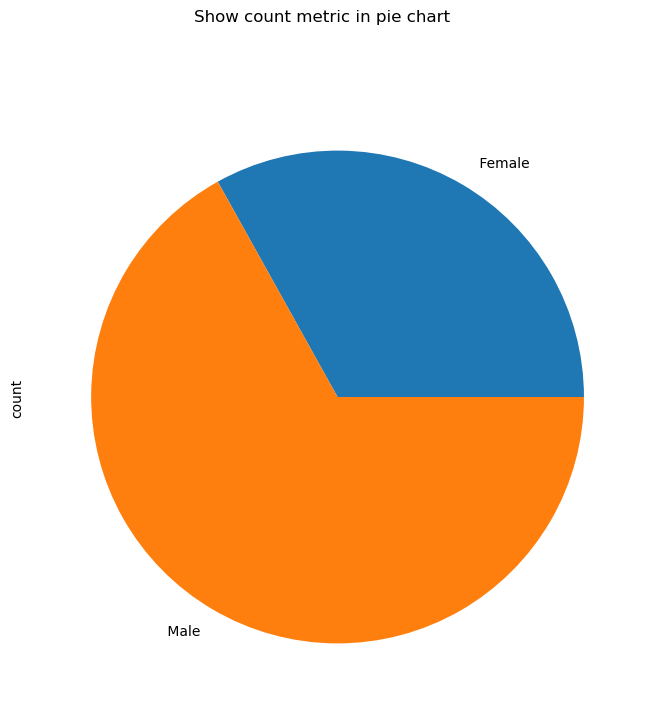

In [30]:
from fairlearn.metrics import (
    MetricFrame,
    count,
    false_negative_rate,
    false_positive_rate,
    selection_rate,
)

import pandas as pd
from pyspark.sql import SparkSession

# Step 1: Initialize Spark session and read the fixed downloaded data
spark = SparkSession.builder \
    .appName("Read and Process Data") \
    .getOrCreate()

# Path to the fixed downloaded file
file_path = '/mnt/d/FY2024/myPython/myJupyterNB/adult_downloaded.data'

# Read the downloaded file into a PySpark DataFrame
spark_df = spark.read.csv(file_path, header=False, inferSchema=True)

# Define the correct headers
headers = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'label'
]

# Convert to pandas DataFrame
df_downloaded = spark_df.toPandas()
df_downloaded.columns = headers

# Remove any extraneous rows if they exist
df_downloaded = df_downloaded[1:].reset_index(drop=True)

# Step 2: Apply transformations similar to fetch_adult

# Convert categorical columns to dummy variables
X = pd.get_dummies(df_downloaded.drop(columns='label'))
# Set y_true based on 'label' column
y_true = (df_downloaded['label'] == '>50K') * 1

# Extract the sensitive feature 'sex'
sex = df_downloaded['sex']


# # data = fetch_adult()
# # X = pd.get_dummies(data.data)
# y_true = (data.target == ">50K") * 1
# sex = data.data["sex"]

classifier = DecisionTreeClassifier(min_samples_leaf=10, max_depth=4)
classifier.fit(X, y_true)
y_pred = classifier.predict(X)

# Analyze metrics using MetricFrame
metrics = {
    "accuracy": accuracy_score,
    "precision": precision_score,
    "false positive rate": false_positive_rate,
    "false negative rate": false_negative_rate,
    "selection rate": selection_rate,
    "count": count,
}
metric_frame = MetricFrame(
    metrics=metrics, y_true=y_true, y_pred=y_pred, sensitive_features=sex
)
metric_frame.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    title="Show all metrics",
)

# Customize plots with ylim
metric_frame.by_group.plot(
    kind="bar",
    ylim=[0, 1],
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    title="Show all metrics with assigned y-axis range",
)

# Customize plots with colormap
metric_frame.by_group.plot(
    kind="bar",
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    colormap="Accent",
    title="Show all metrics in Accent colormap",
)

# Customize plots with kind (note that we are only plotting the "count" metric here because we are showing a pie chart)
metric_frame.by_group[["count"]].plot(
    kind="pie",
    subplots=True,
    layout=[1, 1],
    legend=False,
    figsize=[12, 8],
    title="Show count metric in pie chart",
)

# Saving plots
fig = metric_frame.by_group[["count"]].plot(
    kind="pie",
    subplots=True,
    layout=[1, 1],
    legend=False,
    figsize=[12, 8],
    title="Show count metric in pie chart",
)

# Don't save file during doc build
if "__file__" in locals():
    fig[0][0].figure.savefig("filename.png")